In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import descartes
from shapely.geometry import Point, Polygon
%matplotlib inline

In [50]:
df = pd.read_csv("clean_ohe2.csv")

In [51]:
df_coordinates = df[["lat", "long"]].copy()

In [52]:
df['price_log'] = np.log(df['price'])

In [57]:
df_price_log = df["price_log"].copy()

In [53]:
king_county_school_districts_map = gpd.read_file("/Users/hunter_ewing/Documents/Flatiron_Program/Module_1/dsc-v2-mod1-final-project-seattle-ds-080519/king_county_school_districts")

In [ ]:
fig, ax = plt.subplots(figsize = (15, 15))
king_county_school_districts_map.plot(ax = ax)

In [23]:
crs = {"init": "espg.4326"}

In [55]:
geometry = [Point(xy) for xy in zip( df["long"], df["lat"])]
geometry[:3]

In [56]:
geo_df = gpd.GeoDataFrame(df_coordinates, crs = crs, geometry = geometry)
geo_df.head()

,lat,long,geometry
0,47.5112,-122.257,POINT (-122.257 47.5112)
1,47.7210,-122.319,POINT (-122.319 47.721)
2,47.7379,-122.233,POINT (-122.233 47.7379)
3,47.5208,-122.393,POINT (-122.393 47.5208)
4,47.6168,-122.045,POINT (-122.045 47.6168)


In [58]:
log_price_with_coordinates = gpd.GeoDataFrame(df_price_log, crs = crs, geometry = geometry)
log_price_with_coordinates.head()

,price_log,geometry
0,12.309982,POINT (-122.257 47.5112)
1,13.195614,POINT (-122.319 47.721)
2,12.100712,POINT (-122.233 47.7379)
3,13.311329,POINT (-122.393 47.5208)
4,13.142166,POINT (-122.045 47.6168)


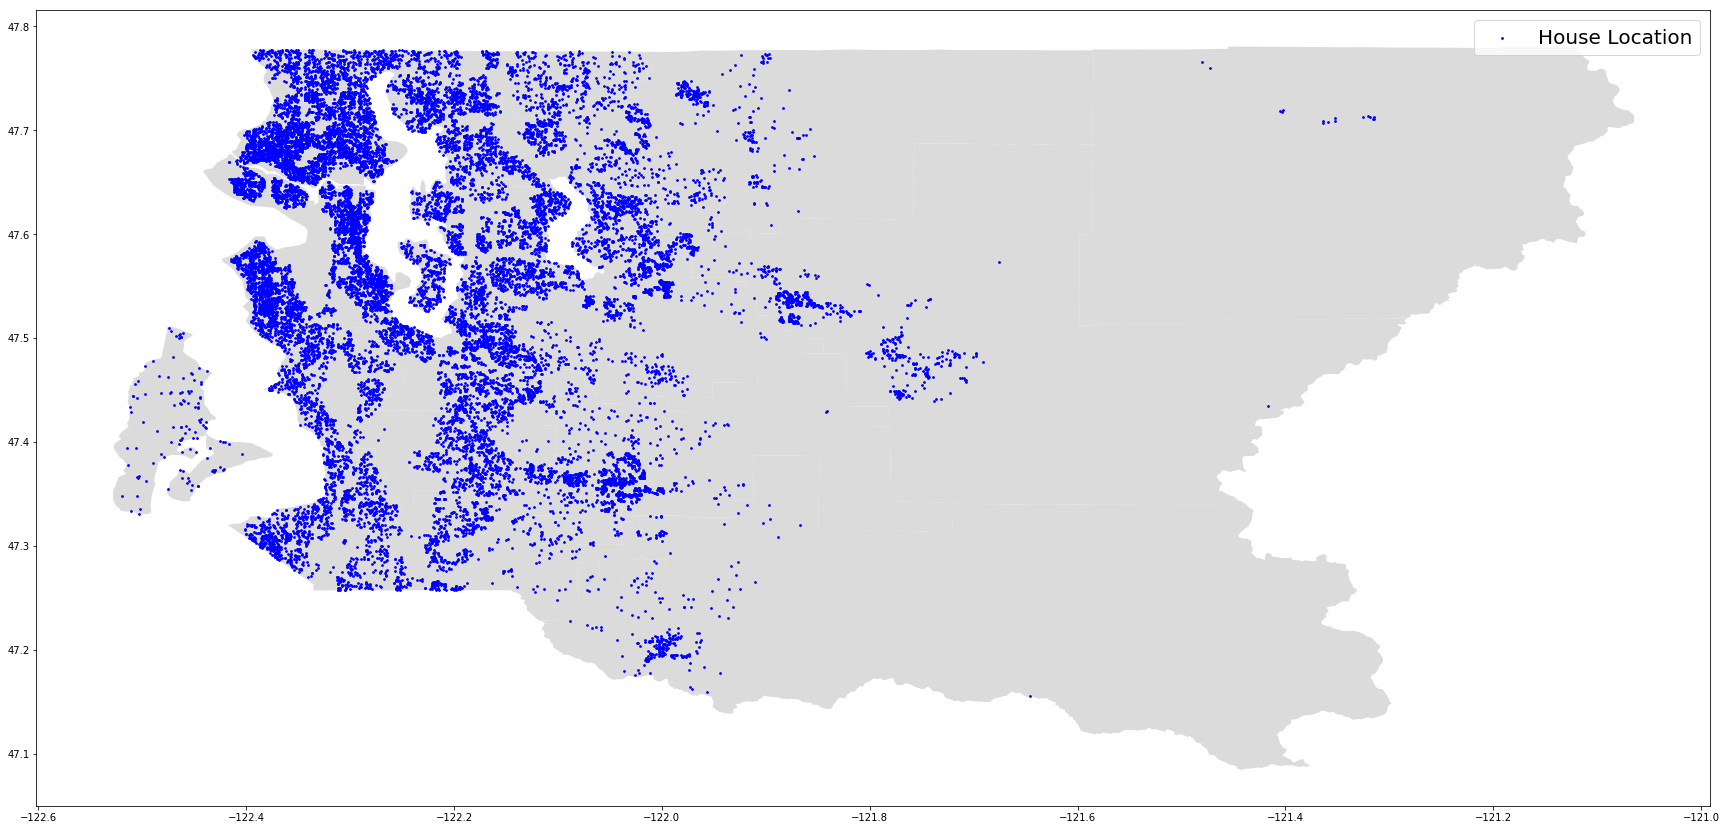

In [62]:
fig, ax=plt.subplots(figsize = (30, 30))
king_county_school_districts_map.plot(ax=ax,alpha=50, color="lightgrey")
geo_df[geo_df["geometry"]!=0].plot(ax=ax, markersize=3, color="blue", marker="o", label = "House Location")
plt.legend(prop={"size": 20})

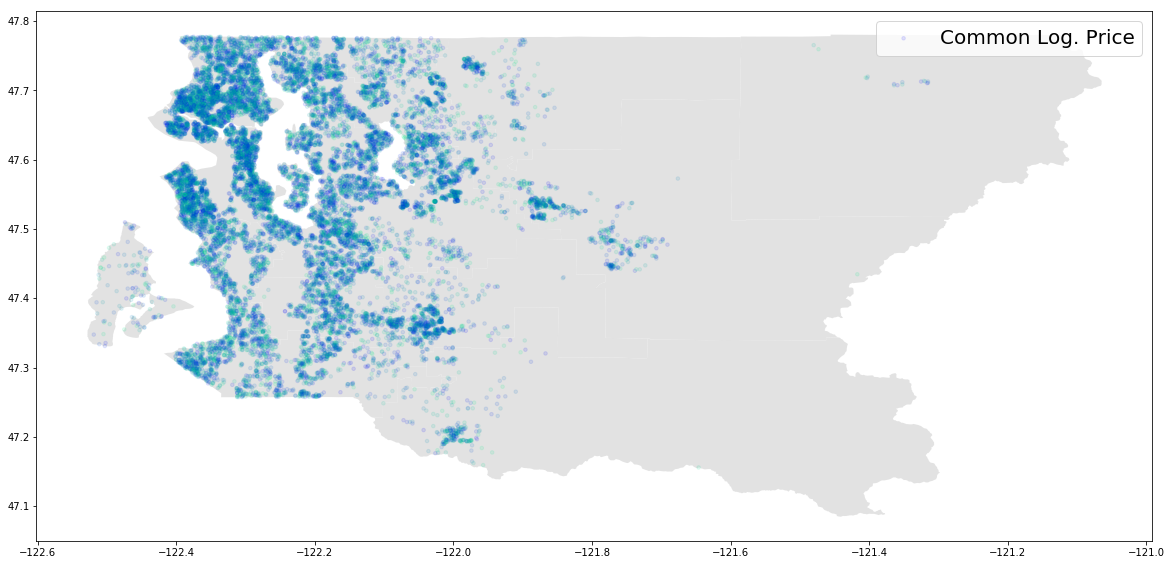

In [106]:
fig, ax=plt.subplots(figsize = (20, 30))
king_county_school_districts_map.plot(ax=ax,alpha=50, color = "gainsboro")
log_price_with_coordinates[log_price_with_coordinates["price_log"]!=0].plot(ax=ax, markersize=50, c='price_log',
                cmap=plt.get_cmap("winter"), marker=".", label = "Common Log. Price", alpha=0.1)
plt.legend(prop={"size": 20})

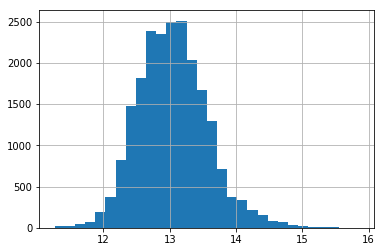

In [94]:
log_price_with_coordinates['price_log'].hist(bins=30)

In [ ]:
# plt.scatter(data=df, x='long', y='lat', alpha=0.2, c='price_log',
#                 cmap=plt.get_cmap('rainbow'))
# plt.legend()
# plt.xlabel('Longtitude',fontsize=14)
# plt.ylabel('Latitude',fontsize=14)

df.plot(kind='scatter',x='long',y='lat',alpha=0.4,figsize=(10,7),c='price_log',
                cmap=plt.get_cmap('rainbow'),colorbar=True,sharex=False)
plt.show()

In [67]:
log_price_with_coordinates.plot